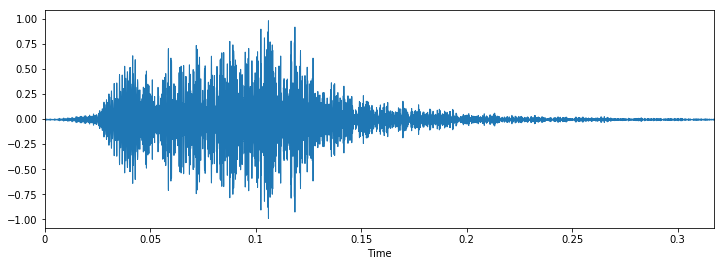

In [5]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt

filename = 'samples/audio/100032-3-0-0.wav'
plt.figure(figsize=(12, 4))
data, sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data, sr=sample_rate)
ipd.Audio(filename)

In [6]:
import pandas as pd
metadata = pd.read_csv('samples/metadata/UrbanSound8k.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class_name
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [7]:
print(metadata.class_name.value_counts()) 

engine_idling       1000
drilling            1000
dog_bark            1000
air_conditioner     1000
children_playing    1000
street_music        1000
jackhammer          1000
siren                929
car_horn             429
gun_shot             374
Name: class_name, dtype: int64


In [8]:
import os

from helpers.wavfilehelper import WavFileHelper
wavfilehelper = WavFileHelper()

audiodata = []
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath('C:/dev/school/UrbanSound8K/audio/'),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    data = wavfilehelper.read_file_properties(file_name)
    audiodata.append(data)
    
audiodf = pd.DataFrame(audiodata, columns=['num_channels', 'sample_rate', 'bit_depth'])

In [9]:
print(audiodf.num_channels.value_counts(normalize=True))

2    0.915369
1    0.084631
Name: num_channels, dtype: float64


In [11]:
# sample rates

print(audiodf.sample_rate.value_counts(normalize=True))

44100     0.614979
48000     0.286532
96000     0.069858
24000     0.009391
16000     0.005153
22050     0.005039
11025     0.004466
192000    0.001947
8000      0.001374
11024     0.000802
32000     0.000458
Name: sample_rate, dtype: float64


In [16]:
# bit depth

print(audiodf.bit_depth.value_counts(normalize=True))

16    0.659414
24    0.315277
32    0.019354
8     0.004924
4     0.001031
Name: bit_depth, dtype: float64
